In [4]:
# Let's revisit the co-authorship data.
import networkx as nx
import urllib
# Fetch co-author network from http://snap.stanford.edu/data/ca-GrQc.html
urllib.urlretrieve ("http://snap.stanford.edu/data/ca-GrQc.txt.gz", "ca-GrQc.txt.gz")
graph = nx.read_edgelist('ca-GrQc.txt.gz')

In [8]:
print len(graph.degree())

5242


In [7]:
print type(graph.degree())

<type 'dict'>


In [9]:
degrees = graph.degree()
author = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[500][0]
print 'selected author %s with degree %d' % (author, graph.degree(author))

selected author 18743 with degree 13


In [10]:
def get_subgraph(graph, node, n=100):
    """ Get the subgraph consisting of this node and its neighbors,
    and their neighbors, up to $n$ total nodes"""
    neighbors = graph.neighbors(node)
    result = set([node])
    for x in neighbors:
        maxsize = n - len(result)
        toadd = set(graph.neighbors(x)) - result
        result.update(list(toadd)[:maxsize])
        if len(result) > n:
            break
    return graph.subgraph(result)

subgraph = get_subgraph(graph, author, n=30)
print 'subgraph has %d nodes' % len(subgraph.nodes())

subgraph has 28 nodes


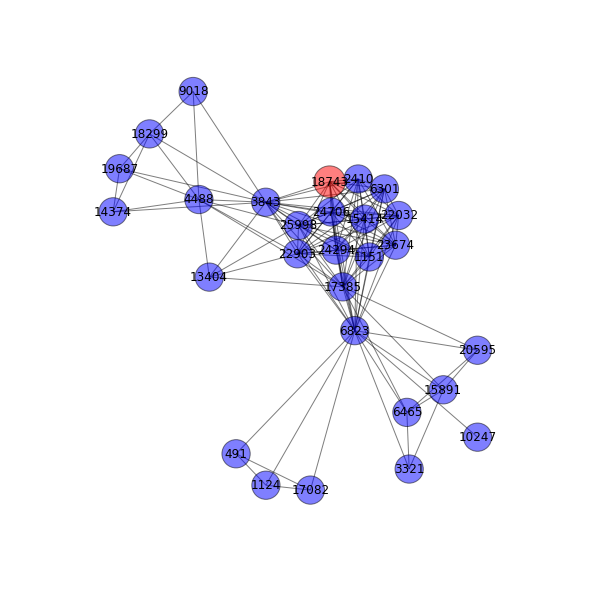

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_subgraph(subgraph, node):
    nodes = subgraph.nodes()
    idx = nodes.index(node)
    colors = ['b'] * len(nodes)
    colors[idx] = 'r'
    sizes = [800] * len(nodes)
    sizes[idx] = 1000
    plt.figure(figsize=(10,10))
    plt.axis('off')
    nx.draw_networkx(subgraph, nodelist=nodes, with_labels=True,
                     width=1, node_color=colors,
                     node_size=sizes, alpha=.5)

plot_subgraph(subgraph, author)

In [12]:
from pprint import pprint  # I'm using this to print list of tuples in a more readable way.

def rank_by_shortest_path(graph, node):
    paths = nx.shortest_path_length(graph, node)
    return sorted(paths.items(), key=lambda x: x[1])

shortest_paths = rank_by_shortest_path(graph, author)
pprint([s for s in shortest_paths if s[1] == 2])
# Many shortest paths of length 2!

[(u'3321', 2),
 (u'10247', 2),
 (u'1124', 2),
 (u'9018', 2),
 (u'13404', 2),
 (u'17082', 2),
 (u'20595', 2),
 (u'6465', 2),
 (u'491', 2),
 (u'19687', 2),
 (u'14374', 2),
 (u'4488', 2),
 (u'18299', 2),
 (u'15891', 2)]


In [13]:
from collections import Counter

def rank_by_common_neighbors(graph, node):
    neighbors = set(graph.neighbors(node))
    scores = []
    for n in graph.nodes():
        neighbors2 = set(graph.neighbors(n))
        scores.append((n, len(neighbors & neighbors2)))
    return sorted(scores, key=lambda x: x[1], reverse=True)
common_neighbors = rank_by_common_neighbors(graph, author)
print 'Histogram of number of nodes with common neighbors:\n', \
    Counter([x[1] for x in common_neighbors if x[1] > 1])

Histogram of number of nodes with common neighbors:
Counter({12: 13, 2: 3, 4: 2, 13: 1})


In [14]:
print common_neighbors

[(u'18743', 13), (u'22903', 12), (u'17385', 12), (u'1151', 12), (u'22032', 12), (u'23674', 12), (u'24294', 12), (u'24706', 12), (u'2410', 12), (u'25998', 12), (u'3843', 12), (u'6301', 12), (u'15414', 12), (u'6823', 12), (u'4488', 4), (u'13404', 4), (u'20595', 2), (u'6465', 2), (u'15891', 2), (u'1124', 1), (u'17082', 1), (u'18299', 1), (u'3321', 1), (u'10247', 1), (u'491', 1), (u'19687', 1), (u'14374', 1), (u'9018', 1), (u'22748', 0), (u'22504', 0), (u'5259', 0), (u'23991', 0), (u'26130', 0), (u'22466', 0), (u'19711', 0), (u'19710', 0), (u'22463', 0), (u'22462', 0), (u'9389', 0), (u'25852', 0), (u'4027', 0), (u'7109', 0), (u'22507', 0), (u'4023', 0), (u'165', 0), (u'23441', 0), (u'19495', 0), (u'3383', 0), (u'21548', 0), (u'17297', 0), (u'19325', 0), (u'17290', 0), (u'10897', 0), (u'10896', 0), (u'10895', 0), (u'17291', 0), (u'24713', 0), (u'345', 0), (u'7515', 0), (u'8807', 0), (u'19159', 0), (u'11427', 0), (u'3999', 0), (u'7510', 0), (u'22269', 0), (u'3996', 0), (u'24718', 0), (u'348'